In [1]:
import sys
import os
current_path = os.path.abspath(os.getcwd())
sys.path.append(os.path.join(current_path, os.pardir, 'Class'))

from Dataset_function import *
from Preprocess import *
from TopicModel import *
from LdaAnalysis import *
from Inference import *
from Similarity import *

In [2]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy import stats
from scipy.stats import shapiro

/home/stsapoui/Project/env/lib/python3.8/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


In [3]:
data_train, abstract_train, body_train, data_val, abstract_val, body_val = extract_Paper("CiteSeerX")

10.1.1.1.6092 not found


In [4]:
data_Arxiv, abstract_Arxiv, body_Arxiv, _, _, _ = extract_Paper("Arxiv")

arXiv:1708.06866 not found
arXiv:2008.13028 not found
arXiv:2103.12910 not found
arXiv:cond-mat/0002276 not found


In [10]:
data_Arxiv

,Title,Author,Date,Journal,Keyword
arXiv:1002.1936,Making Sense of the Evolution of a Scientific ...,"{""Chaomei Chen"",""Jian Zhang"",""Michael S. Vogel...",None,None,None
arXiv:1204.3200,Looking at a digital research data archive - V...,"{""Andrea Scharnhorst"",""Olav ten Bosch"",""Peter ...",None,None,None
arXiv:1205.4776,Visual and semantic interpretability of projec...,"{""Ilknur Icke"",""Andrew Rosenberg""}",None,None,None
arXiv:1206.0536,Visualizing dimensionality reduction of system...,"{""Andreas Lehrmann"",""Michael Huber"",""Aydin C. ...",None,None,None
arXiv:1209.5766,Fast Point-Feature Label Placement for Dynamic...,"{""Kevin Mote""}",None,None,None
...,...,...,...,...,...
arXiv:2104.14962,PSEUDo: Interactive Pattern Search in Multivar...,"{""Yuncong Yu"",""Dylan Kruyff"",""Tim Becker"",""Mic...",None,None,None
arXiv:2105.03839,News Kaleidoscope: Visual Investigation of Cov...,"{""Aditi Mishra"",""Shashank Ginjpalli"",""Chris Br...",None,None,None
arXiv:2105.04897,Visual Analytics of Conversational Dynamics,"{""Daniel Seebacher"",""Maximilian T. Fischer"",""R...",None,None,None
arXiv:2105.12752,GraphStateVis: Interactive Visual Analysis of ...,"{""Matthias Miller"",""Daniel Miller""}",None,None,None


In [11]:
body_arxiv = Preprocessing1("body_arxiv",body_Arxiv,list(data_Arxiv.index))
body_arxiv.execute()

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,Tokenization done
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24

In [12]:
abstract_arxiv = Preprocessing1("abstract_arxiv",abstract_Arxiv,list(data_Arxiv.index))
abstract_arxiv.execute()

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,Tokenization done
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24

In [13]:
body_arxiv.save("Saved Data")
abstract_arxiv.save("Saved Data")

In [14]:
body_arxiv = Preprocessing1('body_arxiv')
body_arxiv.load('Saved Data/body_arxiv.pickle')

abstract_arxiv = Preprocessing1('abstract_arxiv')
abstract_arxiv.load('Saved Data/abstract_arxiv.pickle')

In [15]:
final_lda_body1 = LDAMallet("final_lda_body1", _)
final_lda_body1.load("Saved Data/final_lda_body1.pickle")

final_lda_abstract1_v1 = LDAMallet("final_lda_abstract1_v1", _)
final_lda_abstract1_v1.load("Saved Data/final_lda_abstract1_v1.pickle")

In [16]:
inference_body_arxiv = Inference('inference_body_arxiv', final_lda_body1, body_arxiv) 

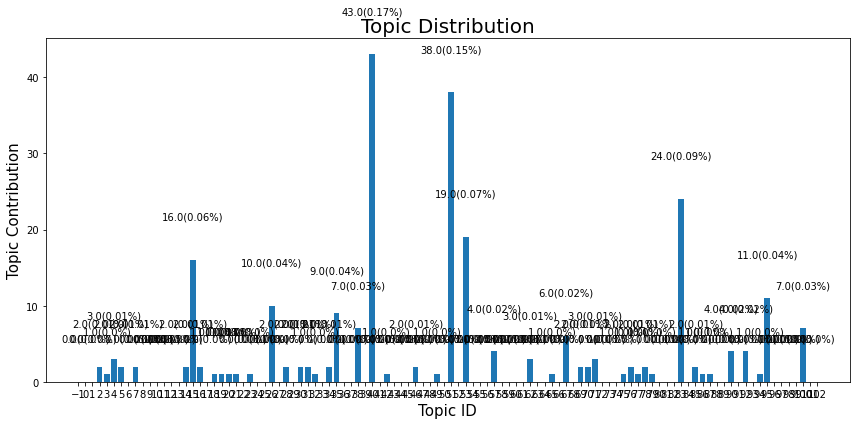

In [17]:
inference_body_arxiv.get_model().topic_repartition()

In [18]:
inference_body_arxiv.save("Saved Data")

In [19]:
inference_abstract_arxiv_v1 = Inference('inference_abstract_arxiv_v1', final_lda_abstract1_v1, abstract_arxiv) 

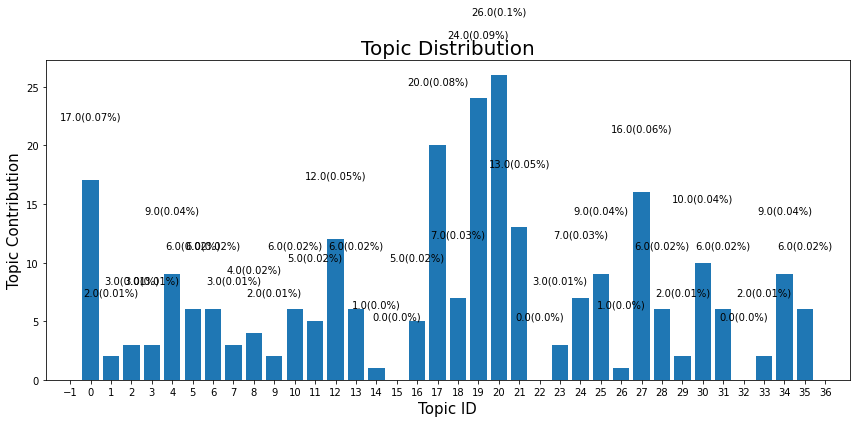

In [20]:
inference_abstract_arxiv_v1.get_model().topic_repartition()

In [21]:
inference_abstract_arxiv_v1.save("Saved Data")

### Start to run here

In [10]:
body_arxiv = Preprocessing1('body_arxiv')
body_arxiv.load('Saved Data/body_arxiv.pickle')

abstract_arxiv = Preprocessing1('abstract_arxiv')
abstract_arxiv.load('Saved Data/abstract_arxiv.pickle')

final_lda_body1 = LDAMallet("final_lda_body1", _)
final_lda_body1.load("Saved Data/final_lda_body1.pickle")

final_lda_abstract1_v1 = LDAMallet("final_lda_abstract1_v1", _)
final_lda_abstract1_v1.load("Saved Data/final_lda_abstract1_v1.pickle")

inference_body_arxiv = Inference('inference_body_arxiv', final_lda_body1, body_arxiv) 
inference_abstract_arxiv_v1 = Inference('inference_abstract_arxiv_v1', final_lda_abstract1_v1, abstract_arxiv) 

body_eval1 = Preprocessing1('body_eval1')
body_eval1.load('Saved Data/body_eval1.pickle')

abstract_eval1 = Preprocessing1('abstract_eval1')
abstract_eval1.load('Saved Data/abstract_eval1.pickle')

inference_body_eval1 = Inference('inference_body_eval1', final_lda_body1, body_eval1) 
inference_abstract_eval1_v1 = Inference('inference_abstract_eval1_v1', final_lda_abstract1_v1, abstract_eval1) 

### At this point, we will try two different ways to calculate similarity between two documents

### The list of avalaible measure

In [6]:
measures = ["JSD","cosine","chebyshev","L2","minkowski", "braycurtis", "canberra", "manhattan", "correlation"]

In [13]:
similarity_arxiv = SimilarityV1V3('Similarity_arxiv', final_lda_abstract1_v1, final_lda_body1, inference_abstract_arxiv_v1, inference_body_arxiv)

In [14]:
similarity_citeseer = SimilarityV1V3('Similarity_citeseer', final_lda_abstract1_v1, final_lda_body1, inference_abstract_eval1_v1, inference_body_eval1)

### Visualization of the similarity score distribution with a target document and the entire training set

In [8]:
similarity.most_similar_sorted(0, measures, 0.5)

[('oai:CiteSeerX.psu:10.1.1.1.3936', 1.0),
 ('oai:CiteSeerX.psu:10.1.1.1.3374', 0.9889562566104975),
 ('oai:CiteSeerX.psu:10.1.1.1.5994', 0.9590064292720367),
 ('oai:CiteSeerX.psu:10.1.1.1.4588', 0.950475371005377),
 ('oai:CiteSeerX.psu:10.1.1.1.3919', 0.9491421130674914),
 ('oai:CiteSeerX.psu:10.1.1.1.3978', 0.925931069984325),
 ('oai:CiteSeerX.psu:10.1.1.1.1615', 0.9209220175010006),
 ('oai:CiteSeerX.psu:10.1.1.1.4507', 0.9156939685648058),
 ('oai:CiteSeerX.psu:10.1.1.1.1619', 0.9055833482378797),
 ('oai:CiteSeerX.psu:10.1.1.1.4495', 0.9029655736649098),
 ('oai:CiteSeerX.psu:10.1.1.1.1519', 0.89811161815319),
 ('oai:CiteSeerX.psu:10.1.1.1.6223', 0.88970733433467),
 ('oai:CiteSeerX.psu:10.1.1.1.6531', 0.8858682683210037),
 ('oai:CiteSeerX.psu:10.1.1.1.6040', 0.8847719472363361),
 ('oai:CiteSeerX.psu:10.1.1.1.4241', 0.8726055810604907),
 ('oai:CiteSeerX.psu:10.1.1.1.6841', 0.8656083975122087),
 ('oai:CiteSeerX.psu:10.1.1.1.5802', 0.8654355885674231),
 ('oai:CiteSeerX.psu:10.1.1.1.6728'

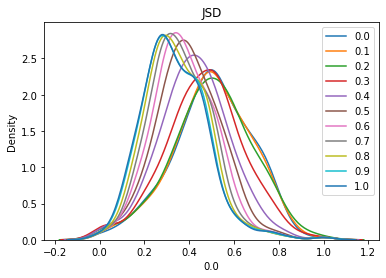

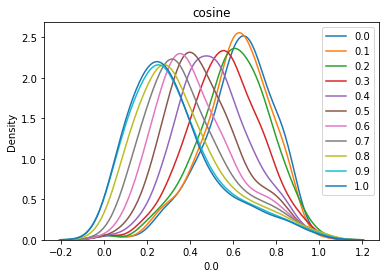

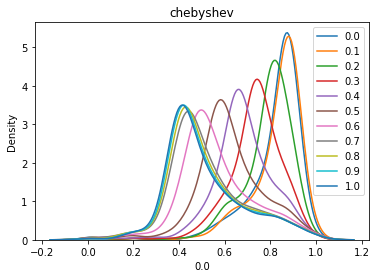

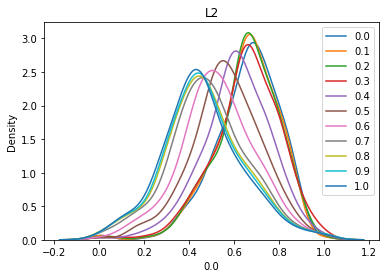

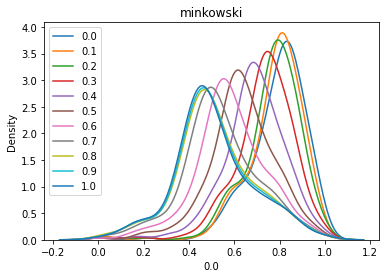

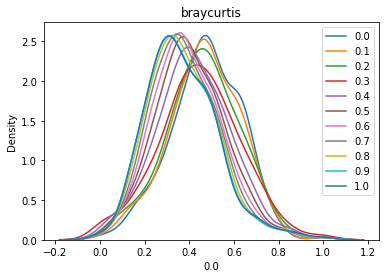

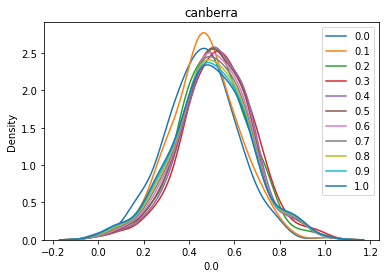

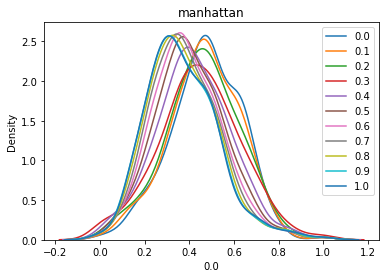

/home/stsapoui/Project/env/lib/python3.8/site-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


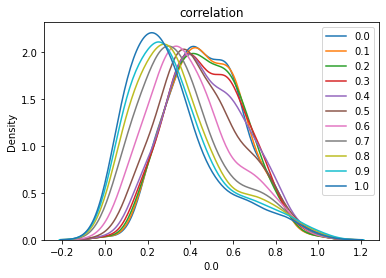

In [9]:
similarity.similarity_distribution_eval(0, measures)

### Measure Normalisation

In [15]:
ms_arxiv = {measure : [] for measure in measures}
for measure in measures:
    ms_arxiv1 = similarity_arxiv.most_similar_sorted(0, measure, 0.8)
    ms_arxiv1 = np.array([m[1] for m in ms_arxiv1])
    ms_arxiv[measure] += list(ms_arxiv1)

In [16]:
ms_citeseer = {measure : [] for measure in measures}
for measure in measures:
    ms_citeseer1 = similarity_citeseer.most_similar_sorted(0, measure, 0.8)
    ms_citeseer1 = np.array([m[1] for m in ms_citeseer1])
    ms_citeseer[measure] += list(ms_citeseer1)

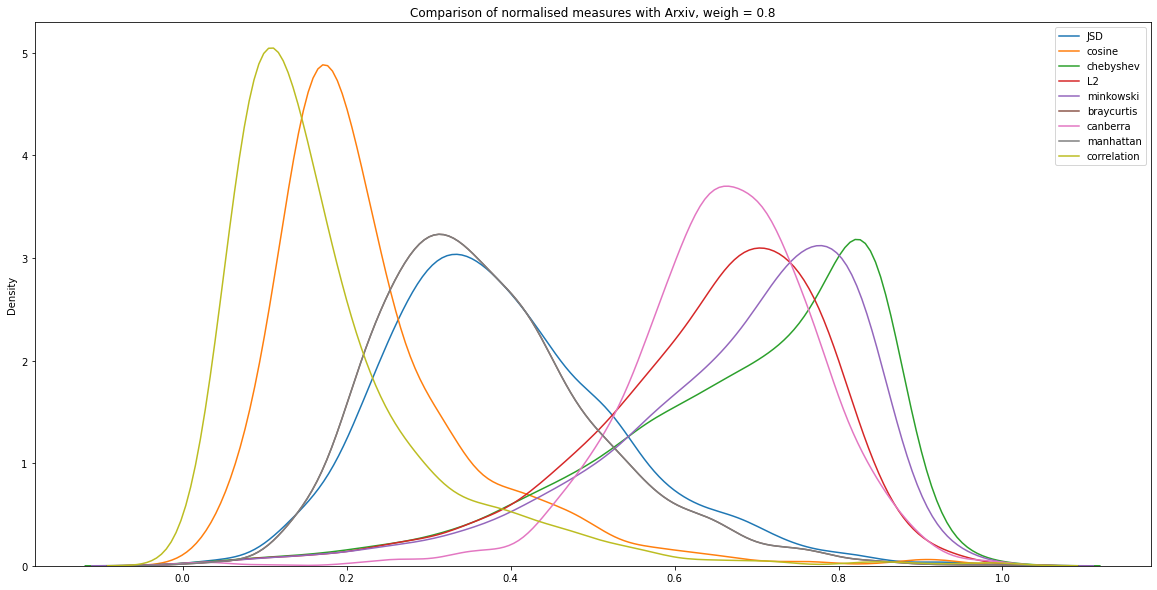

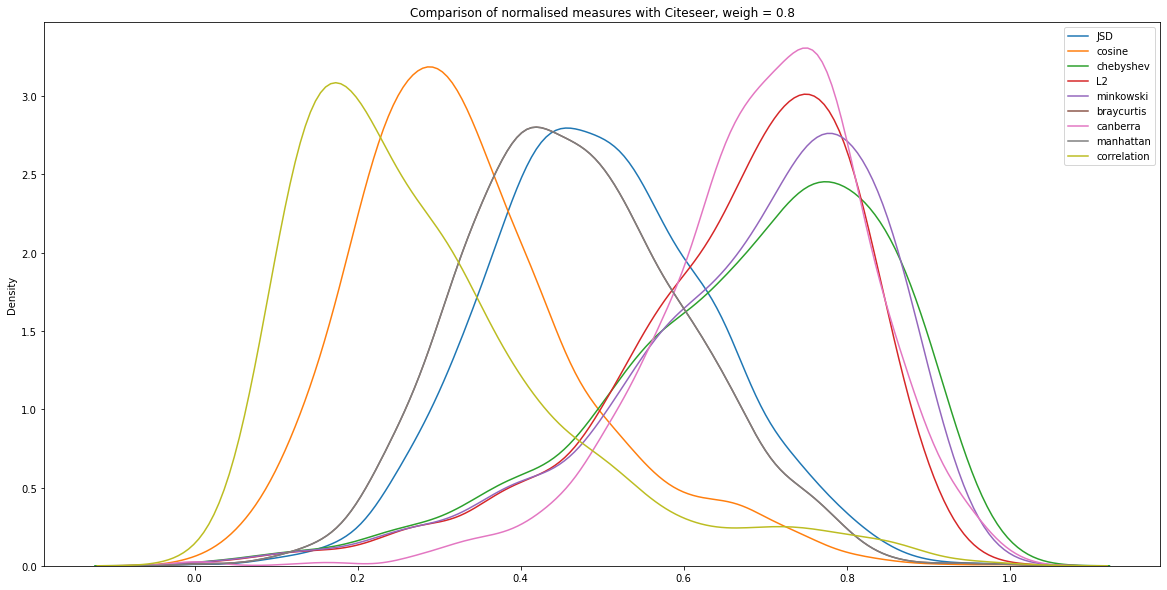

In [21]:
fig = plt.figure(1, figsize=(20, 10))
for measure in measures:
    sns.kdeplot(ms_arxiv[measure], label=measure)
plt.legend() 
plt.title('Comparison of normalised measures with Arxiv, weigh = 0.8')
plt.show()

fig = plt.figure(1, figsize=(20, 10))
for measure in measures:
    sns.kdeplot(ms_citeseer[measure], label=measure)
plt.legend() 

plt.title('Comparison of normalised measures with Citeseer, weigh = 0.8')
plt.show()

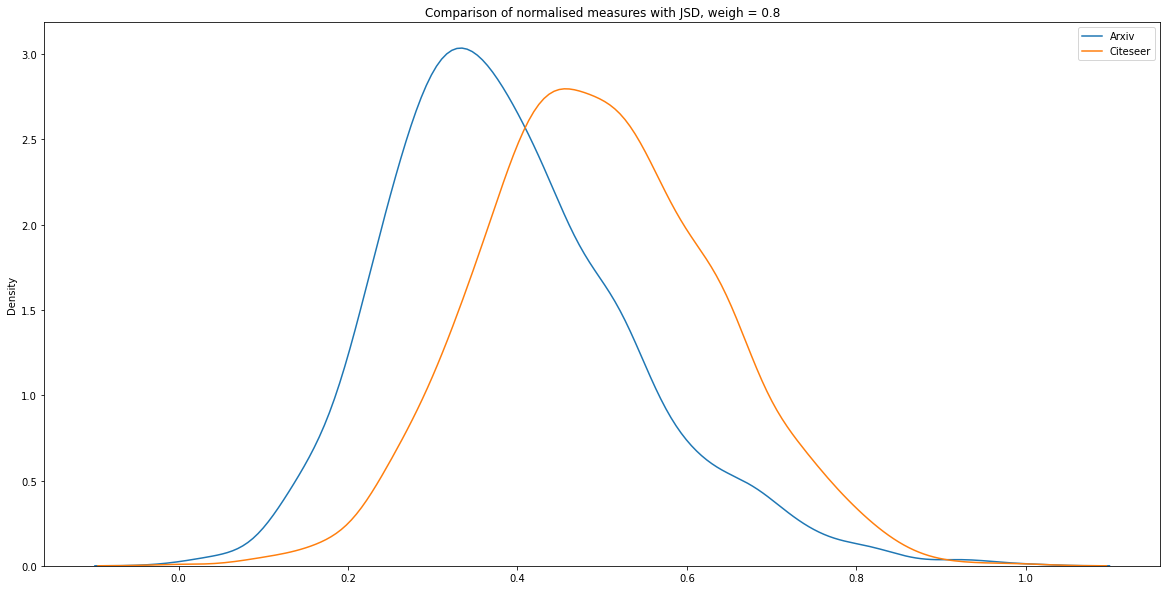

In [25]:
fig = plt.figure(1, figsize=(20, 10))
sns.kdeplot(ms_arxiv["JSD"], label="Arxiv")
sns.kdeplot(ms_citeseer["JSD"], label="Citeseer")
plt.legend() 
plt.title('Comparison of normalised measures with JSD, weigh = 0.8')
plt.show()